In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from matplotlib import cm
import time

import healpy as hp
import pymaster as nmt
import pandas as pd

Data from https://pla.esac.esa.int/#cosmology, (cosmology tab then lensing tab)

Details: https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Lensing

In [2]:
fn_lensing = '../data/COM_Lensing_4096_R3.00/MV/dat_klm.fits'

Guidance here from: https://zonca.dev/2020/09/planck-spectra-healpy.html

In [3]:
alm_lensing = hp.read_alm(fn_lensing)

In [4]:
lmax = 4096
#lmax = 2500
nside = 2048
map_lensing = hp.alm2map(alm_lensing, nside=nside, lmax=lmax)

In [5]:
fn_mask = '../data/COM_Lensing_4096_R3.00/mask.fits.gz'
mask = hp.read_map(fn_mask, dtype=bool)

In [6]:
aposize_deg = 0.5 #30' (arcmin)
mask_apod = nmt.mask_apodization(mask, aposize_deg, apotype="C2")

In [7]:
map_lensing_masked = hp.ma(map_lensing)
map_lensing_masked.mask = np.logical_not(mask_apod)

0.0 180.0 -180.0 180.0


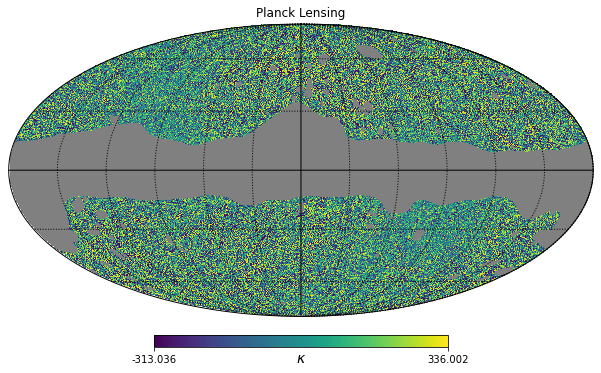

In [8]:
hp.mollview(
    map_lensing_masked,
    title=rf"Planck Lensing",
    unit=r"$\kappa$",
    norm="hist",
    cmap='viridis',
    #coord=['C', 'G']
    #min=-1.5,
    #max=1.5,
)
hp.graticule()

In [9]:
# can't figure out how to set lmin! but this fixes the scaling
# should i mask and then smooth or vice versa??
map_lensing_smooth = hp.smoothing(map_lensing_masked, lmax=1000)

0.0 180.0 -180.0 180.0


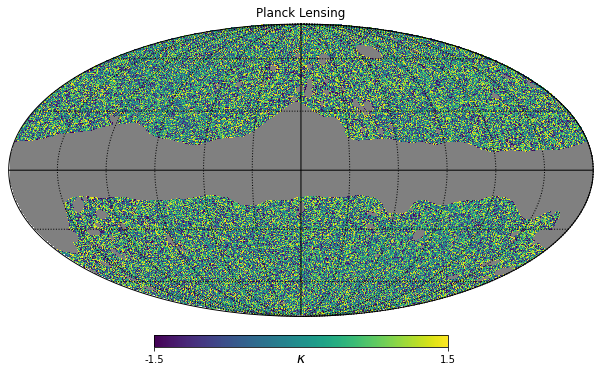

In [10]:
hp.mollview(
    map_lensing_smooth,
    title=rf"Planck Lensing",
    unit=r"$\kappa$",
    norm="hist",
    cmap='viridis',
    #coord=['C', 'G']
    min=-1.5,
    max=1.5,
)
hp.graticule()

## Gaia quasars

## Compute pseudo-Cls

Following https://arxiv.org/pdf/2111.09898.pdf and https://namaster.readthedocs.io/en/latest/sample_simple.html

In [16]:
# Read healpix maps and initialize a spin-0 and spin-2 field
field = nmt.NmtField(mask_apod, [map_lensing_smooth])

"We choose a conservative binning scheme with linearly spaced bins of
size ∆l = 50 starting from l_min = 25."

In [43]:
# Initialize binning scheme with 4 ells per bandpower
#b = nmt.NmtBin.from_nside_linear(nside, 4)
ell_min = 25
ell_max = 6000
ell_bin_width = 50
ell_edges = np.arange(ell_min, ell_max+ell_bin_width, ell_bin_width)
ell_ini = ell_edges[:-1]
ell_end = ell_edges[1:]
b = nmt.NmtBin.from_edges(ell_ini, ell_end)

In [26]:
# Compute MASTER estimator
cl_00 = nmt.compute_full_master(field, field, b)

In [29]:
mult_fac = 1e6

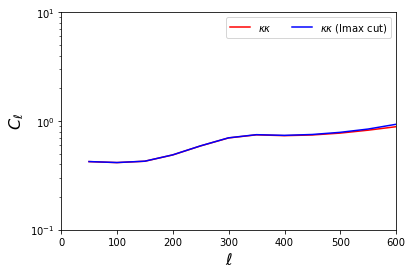

In [46]:
ell_arr = b.get_effective_ells()
ell_arr_cut = b_cut.get_effective_ells()
plt.plot(ell_arr, mult_fac*cl_00[0], 'r-', label=r'$\kappa \kappa$')
plt.plot(ell_arr_cut, mult_fac*cl_00_cut[0], 'b-', label=r'$\kappa \kappa$ (lmax cut)')
plt.yscale('log')
plt.xlim(0, 600)
plt.ylim(1e-1, 1e1)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

In [39]:
# Initialize binning scheme with 4 ells per bandpower
#b = nmt.NmtBin.from_nside_linear(nside, 4)
ell_min = 25
ell_max = 600
ell_bin_width = 50
ell_edges = np.arange(ell_min, ell_max+ell_bin_width, ell_bin_width)
ell_ini = ell_edges[:-1]
ell_end = ell_edges[1:]
b_cut = nmt.NmtBin.from_edges(ell_ini, ell_end)

In [40]:
# Compute MASTER estimator
cl_00_cut = nmt.compute_full_master(field, field, b_cut)